### Batch Model - Precipitation from a closed pool

Gagnon et al. 2007 develop a simple and general relationship for multiple Me/Ca ratio behaviour during Rayleigh fractionation.

Following Elderfield et al (1996), the Sr/Ca of aragonite precipitated at any point during a Rayleigh process from a closed solution can be calculated from the initial composition assuming a constant effective partition coefficient:

$$
\left(\frac{Sr}{Ca}\right)_{coral} = D_{Sr}^{Coral} \left(\frac{Sr}{Ca}\right)_{Sol_{0}} F^{D_{Sr}^{Coral}-1}
$$

Where the extent of precipitation (i.e. fraction of Ca remaining in the solution) is defined as:

$$
F = \left(\frac{Ca}{Ca_{0}}\right)_{sol}
$$

The same expression can be written for Mg/Ca, and since Mg/Ca and Sr/Ca are linked by the extent of precipitation, F, the expressions can be combined, yielding a linear log-log relationship:

$$
\ln \left(\frac{Sr}{Ca}\right) = \left(\frac{D_{Sr}-1}{D_{Mg}-1}\right) \ln \left(\frac{Mg}{Ca}\right) + \left\{ \ln \left(\frac{Sr}{Ca}\right)_{0} - \left(\frac{D_{Sr}-1}{D_{Mg}-1}\right) \ln \left(\frac{Mg}{Ca}\right)_{0} \right\}
$$

In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Write equation as a function (for log-log tracer graph)

def SrCaCoral_ln(Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0):
    return (((Dsr-1)/(Dmg-1)) * (MgCa_coral_ln) + (np.log(SrCa_sol0) - ((Dsr-1)/(Dmg-1)) * np.log(MgCa_sol0)))

In [5]:
## Defining the parameters

Dsr = 1.24 
Dmg = 2.75e-4

SrCa_sol0 = 8.8e-3 # mol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1 # mol/mol seawater concentration

MgCa_coral_ln = np.linspace(-6.8,-6,100)

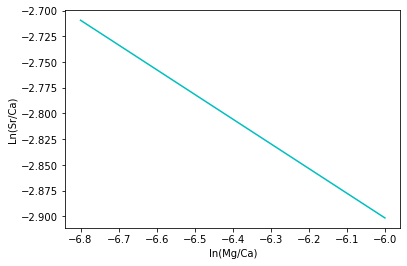

In [6]:
x = MgCa_coral_ln  # converting to mmol/mol

plt.plot(x, (SrCaCoral_ln(Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0)), alpha=1, color='c', label='0.01')

#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('ln(Mg/Ca)')
plt.ylabel('Ln(Sr/Ca)')
plt.ticklabel_format(useOffset=False)
#plt.legend(title="gamma=")

## Non-log Graph

In [2]:
# Write equation as a function (for non-log graph)

def SrCaCoral(Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0):
    return (np.exp(((Dsr-1)/(Dmg-1)) * np.log(MgCa_coral) + (np.log(SrCa_sol0) - ((Dsr-1)/(Dmg-1)) * np.log(MgCa_sol0))))

In [29]:
## Defining the parameters

Dsr = 1.24 
Dmg = 2.75e-4

SrCa_sol0 = 8.8e-3 # mol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1 # mol/mol seawater concentration

MgCa_coral = np.linspace(1e-3,2.7e-3,100) 

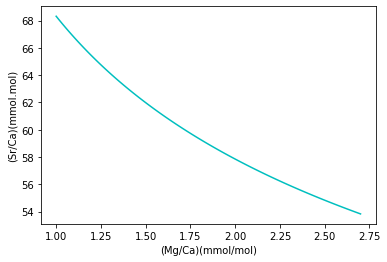

In [30]:
x = MgCa_coral * 1e3  # converting to mmol/mol

plt.plot(x, (SrCaCoral(Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')

#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('(Mg/Ca)(mmol/mol)')
plt.ylabel('(Sr/Ca)(mmol.mol)')
plt.ticklabel_format(useOffset=False)
#plt.legend(title="gamma=")

## Now we define a batch model with active calcium pumping.

We incorporate the variable $\phi$, defined as $1/(1-k/p)$, the balance between precipitation and pumping. Behaving much like an additional partition coefficient, $\phi$ accounts for changes in $\left([Ca\right])_{Sol}$ affecting all Me/Ca ratios. A tracer-tracer relationship in the presence of calcium pumping is linear in a log-log plot, only differing from a completely closed Rayleigh process by the term $\phi$:

$$
\ln \left(\frac{Sr}{Ca}\right) = \left(\frac{\phi D_{Sr}-1}{\phi D_{Mg}-1}\right) \ln \left(\frac{Mg}{Ca}\right) + \left\{ \ln \left(\frac{Sr}{Ca}\right)_{0} - \left(\frac{\phi D_{Sr}-1}{\phi D_{Mg}-1}\right) \ln \left(\frac{Mg}{Ca}\right)_{0} \right\}
$$

In [94]:
# Write equation as a function (for non-log graph)

def SrCaCoralPump(phi, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0):
    return (np.exp(((phi*Dsr-1)/(phi*Dmg-1)) * np.log(MgCa_coral) + (np.log(SrCa_sol0) - ((phi*Dsr-1)/(phi*Dmg-1)) * np.log(MgCa_sol0))))



In [95]:
## Defining the parameters

Dsr = 1.25 
Dmg = 2.75e-4

SrCa_sol0 = 8.8e-3 # mol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1 # mol/mol seawater concentration

MgCa_coral = np.linspace(1e-3,2.7e-3,100) 

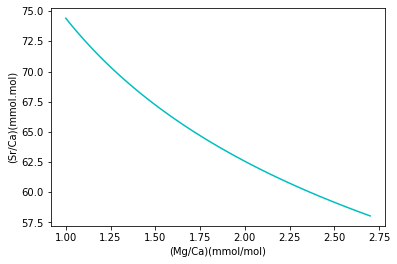

In [96]:
x = MgCa_coral * 1e3  # converting to mmol/mol

plt.plot(x, (SrCaCoralPump(1, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')
#plt.plot(x, (SrCaCoralPump(1.1, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='m', label='0.01')
#plt.plot(x, (SrCaCoralPump(-3, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='y', label='0.01')
#plt.plot(x, (SrCaCoralPump(3, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='g', label='0.01')

#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('(Mg/Ca)(mmol/mol)')
plt.ylabel('(Sr/Ca)(mmol.mol)')
plt.ticklabel_format(useOffset=False)
#plt.legend(title="gamma=")

Text(0.5, 1.0, '$\\phi = 4$')

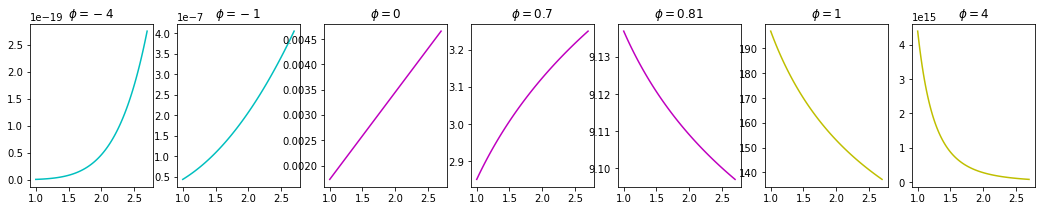

In [91]:
x = MgCa_coral * 1e3  # converting to mmol/mol

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharex=True, figsize=(18, 3))


ax1.plot(x, (SrCaCoralPump(-4, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')
ax2.plot(x, (SrCaCoralPump(-1, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')
ax3.plot(x, (SrCaCoralPump(0.0, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='m', label='0.99')
ax4.plot(x, (SrCaCoralPump(0.7, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='m', label='0.99')
ax5.plot(x, (SrCaCoralPump(0.81, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='m', label='0.99')
ax6.plot(x, (SrCaCoralPump(1.1, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='y', label='0.99')
ax7.plot(x, (SrCaCoralPump(4, Dsr, Dmg, MgCa_coral, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='y', label='0.99')


ax1.set_title('$\phi=-4$')
ax2.set_title('$\phi=-1$')
ax3.set_title('$\phi=0$')
ax4.set_title('$\phi=0.7$')
ax5.set_title('$\phi=0.81$')
ax6.set_title('$\phi=1$')
ax7.set_title('$\phi = 4$')



In [86]:
# Write equation as a function (for log-log tracer graph)

def SrCaCoralPump_ln(phi, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0):
    return (((phi*Dsr-1)/(phi*Dmg-1)) * (MgCa_coral_ln) + (np.log(SrCa_sol0) - ((phi*Dsr-1)/(phi*Dmg-1)) * np.log(MgCa_sol0)))

In [87]:
## Defining the parameters

Dsr = 1.24 
Dmg = 2.75e-4

SrCa_sol0 = 8.8e-3 # mol/mol This is a 3% enrichment from natural seawater
MgCa_sol0 = 5.1 # mol/mol seawater concentration

MgCa_coral_ln = np.linspace(-6.8,-6,100)

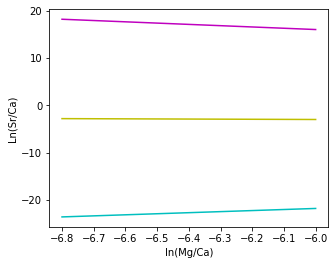

In [88]:
x = MgCa_coral_ln  # converting to mmol/mol

plt.figure(figsize=(5,4))

plt.plot(x, (SrCaCoralPump_ln(-1, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0)), alpha=1, color='c', label='0.01')
plt.plot(x, (SrCaCoralPump_ln(3, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0)), alpha=1, color='m', label='0.01')
plt.plot(x, (SrCaCoralPump_ln(0.99, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0)), alpha=1, color='y', label='0.01')


#plt.xlim(-3,3)
#plt.ylim(0,12)
plt.xlabel('ln(Mg/Ca)')
plt.ylabel('Ln(Sr/Ca)')
plt.ticklabel_format(useOffset=False)

#plt.legend(title="gamma=")

Text(0.5, 1.0, '$\\phi = 4$')

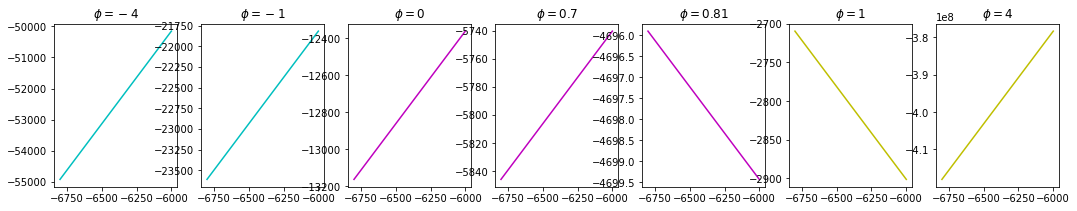

In [93]:
x = MgCa_coral_ln * 1e3  # converting to mmol/mol

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharex=True, figsize=(18, 3))


ax1.plot(x, (SrCaCoralPump_ln(-4, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')
ax2.plot(x, (SrCaCoralPump_ln(-1, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='c', label='0.01')
ax3.plot(x, (SrCaCoralPump_ln(0.0, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='m', label='0.99')
ax4.plot(x, (SrCaCoralPump_ln(0.7, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='m', label='0.99')
ax5.plot(x, (SrCaCoralPump_ln(0.81, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='m', label='0.99')
ax6.plot(x, (SrCaCoralPump_ln(1, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='y', label='0.99')
ax7.plot(x, (SrCaCoralPump_ln(4000, Dsr, Dmg, MgCa_coral_ln, SrCa_sol0, MgCa_sol0))*1e3, alpha=1, color='y', label='0.99')


ax1.set_title('$\phi=-4$')
ax2.set_title('$\phi=-1$')
ax3.set_title('$\phi=0$')
ax4.set_title('$\phi=0.7$')
ax5.set_title('$\phi=0.81$')
ax6.set_title('$\phi=1$')
ax7.set_title('$\phi = 4000$')
